In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [20]:
# Load the Excel file
customer = pd.read_csv('Telco-Customer-Churn.csv')
# Display the first few rows of the dataframe
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
#Finding shape of the data
customer.shape

(7043, 21)

In [22]:
# Dropping unnecessary column
customer.drop('customerID',axis=1,inplace=True) 

In [23]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [24]:
# Replace empty strings or spaces with NaN in the TotalCharges column
customer['TotalCharges'] = customer['TotalCharges'].replace(' ', pd.NA)

# Drop rows with NaN values in the TotalCharges column
customer = customer.dropna(subset=['TotalCharges'])

# Convert TotalCharges to numeric
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'])

In [25]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [26]:
customer.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
# Numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Categorical columns 
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


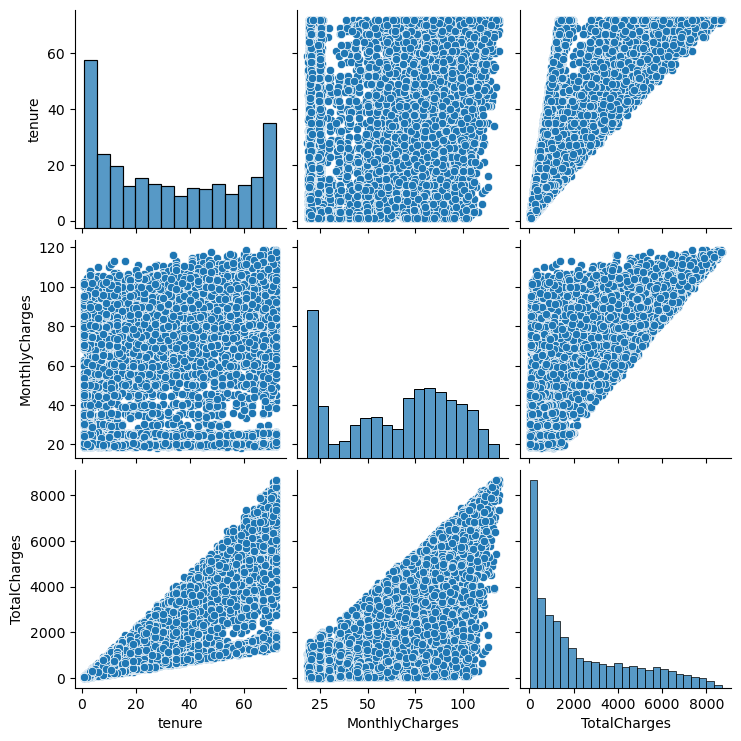

In [28]:
# Plot the pair plot
sns.pairplot(customer[numerical_cols])
plt.show()

## Distribution of Numerical Columns

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


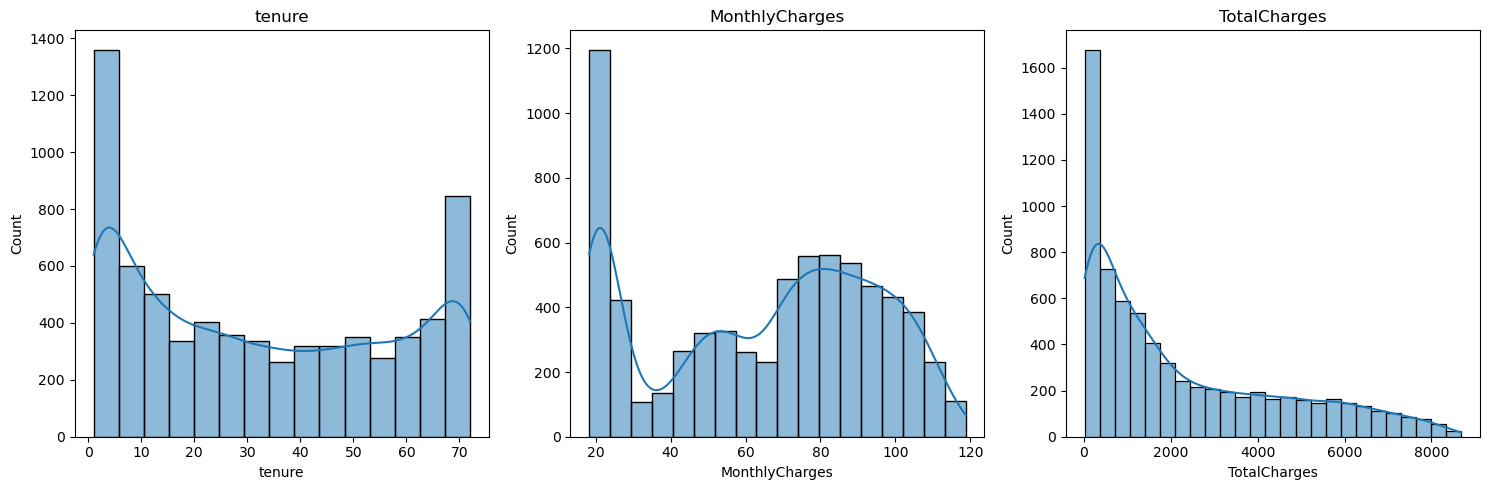

In [29]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(customer[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()    

## Count Plots for Categorical Columns

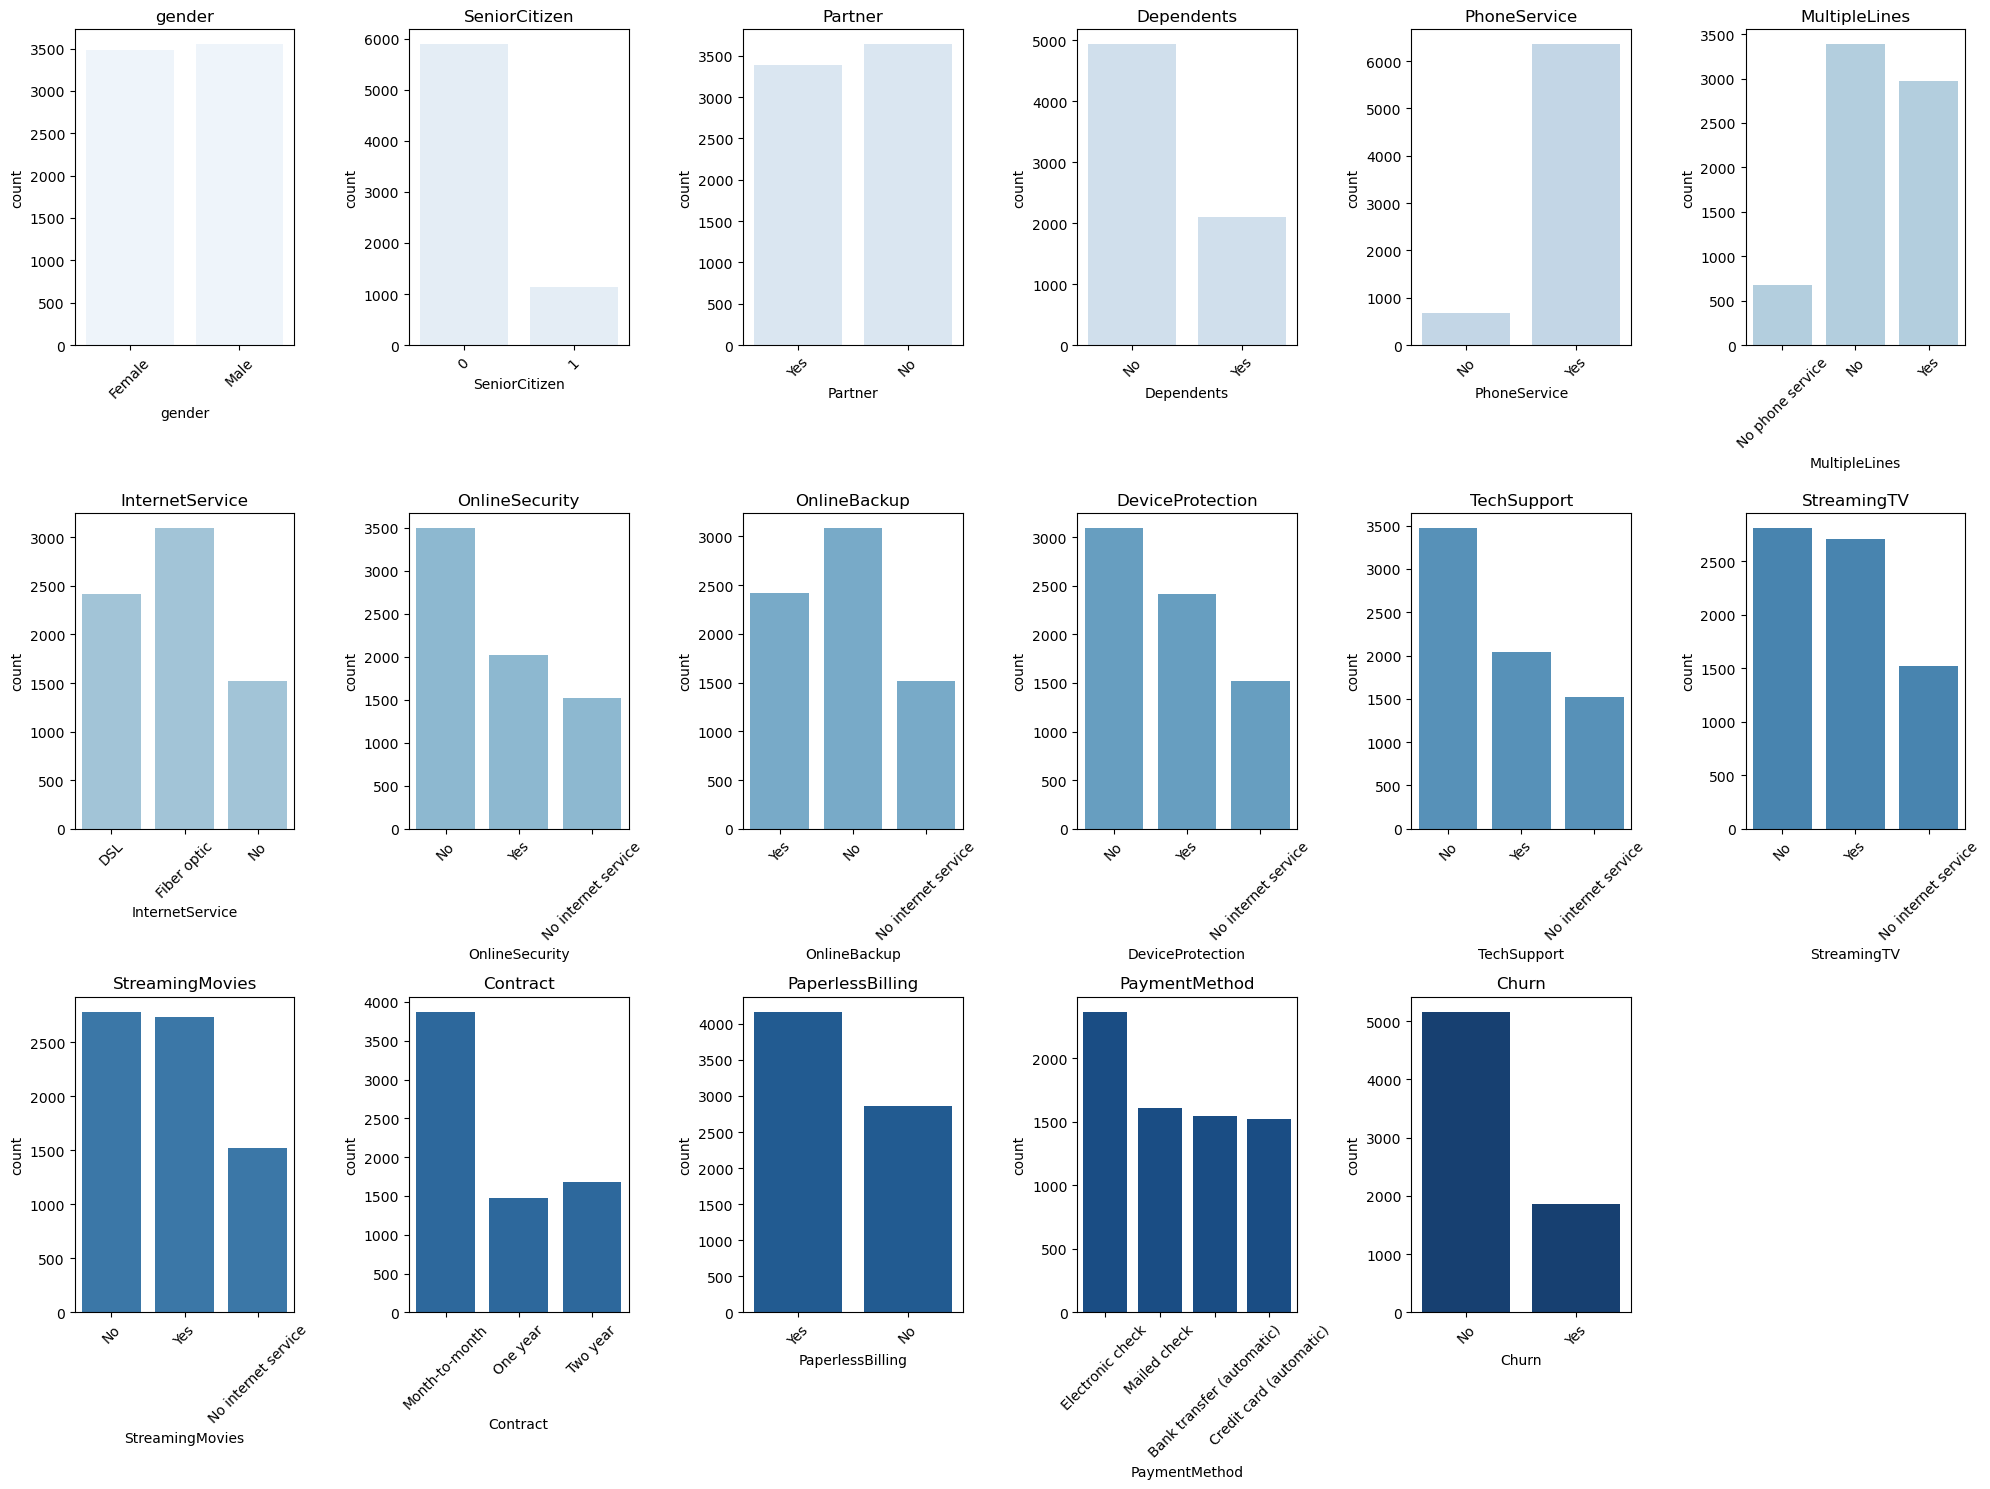

In [30]:
# Convert all categorical columns to strings
customer[categorical_cols] = customer[categorical_cols].astype(str)

# Define a color palette with shades of blue
color_palette = sns.color_palette("Blues", len(categorical_cols))

# Plotting count plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 5) // 6, 6, i)
    sns.countplot(data=customer, x=col, palette=[color_palette[i-1]])
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Box Plots for Numerical Columns against Churn

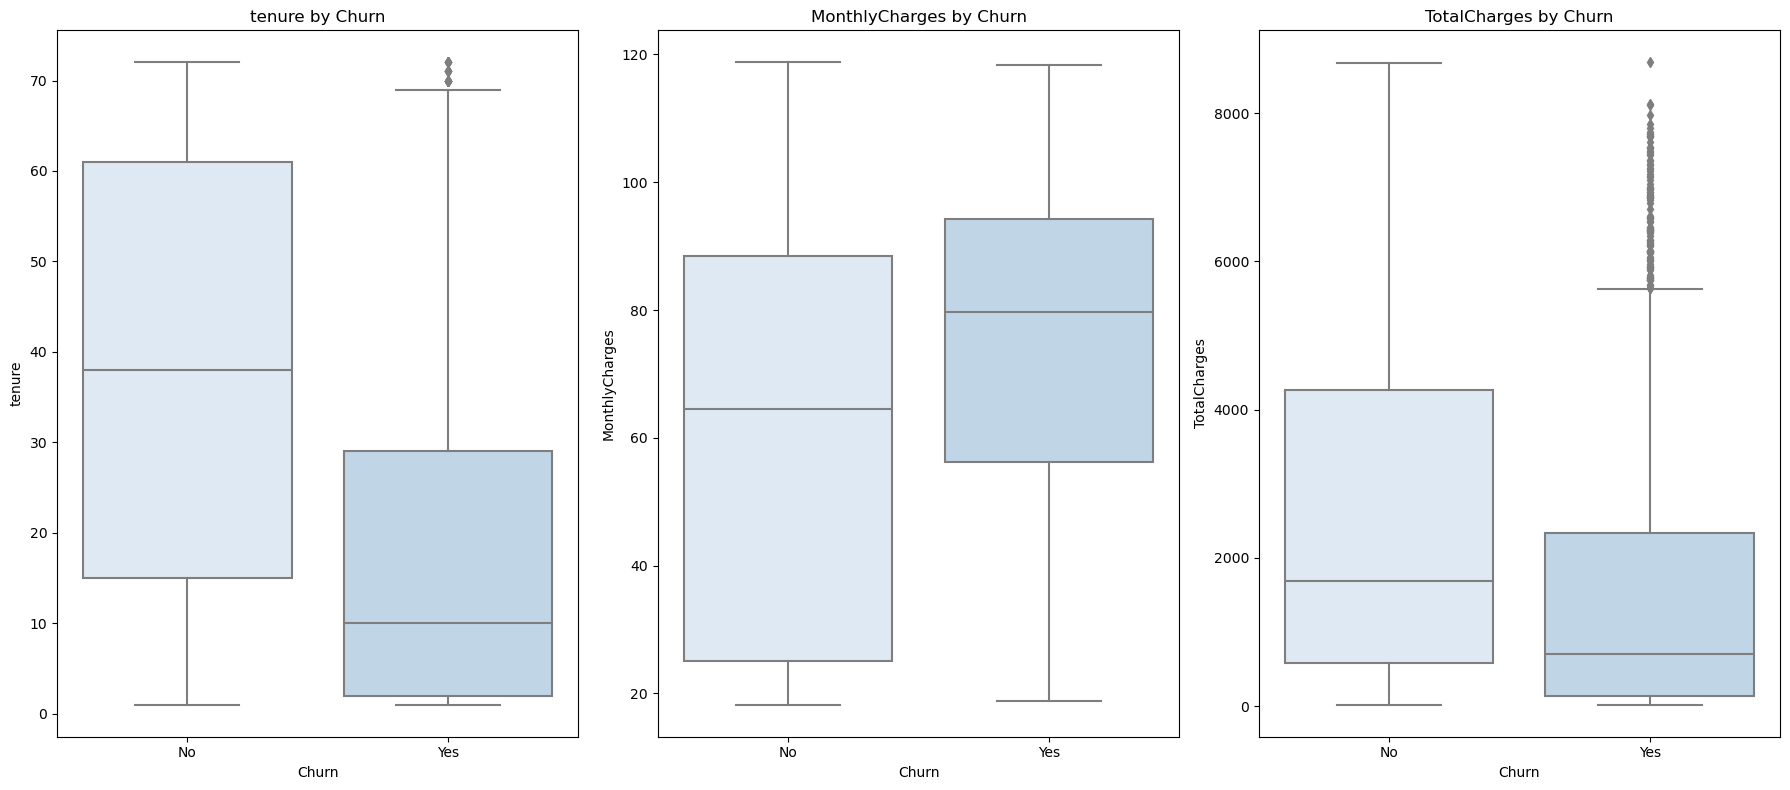

In [31]:
# Define the blue color palette
blue_palette = sns.color_palette("Blues")

# Plot box plots for numerical columns against Churn
plt.figure(figsize=(18, 8))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=column, data=customer, palette=blue_palette)
    plt.title(f'{column} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


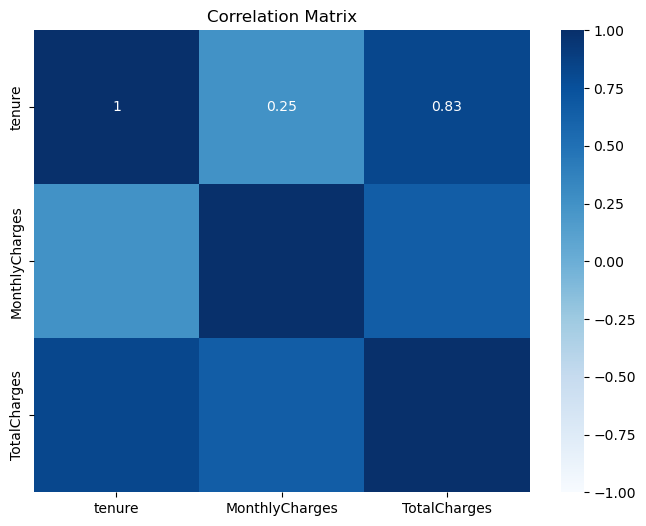

In [32]:
corr_matrix = customer[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [33]:
# Identify the columns to encode
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
categorical_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Encode binary columns (Yes/No to 1/0) using replace method
customer[binary_cols] = customer[binary_cols].replace({'Yes': 1, 'No': 0})

# One-hot encode categorical columns
customer = pd.get_dummies(customer, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integers using applymap
customer = customer.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Display the first few rows of the dataframe
customer.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6876\2395268381.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer = customer.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
# Displaying statistics
customer.describe()

,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.504693,0.096701,...,0.290102,0.216155,0.384386,0.216155,0.388367,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.500014,0.295571,...,0.453842,0.411650,0.486484,0.411650,0.487414,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


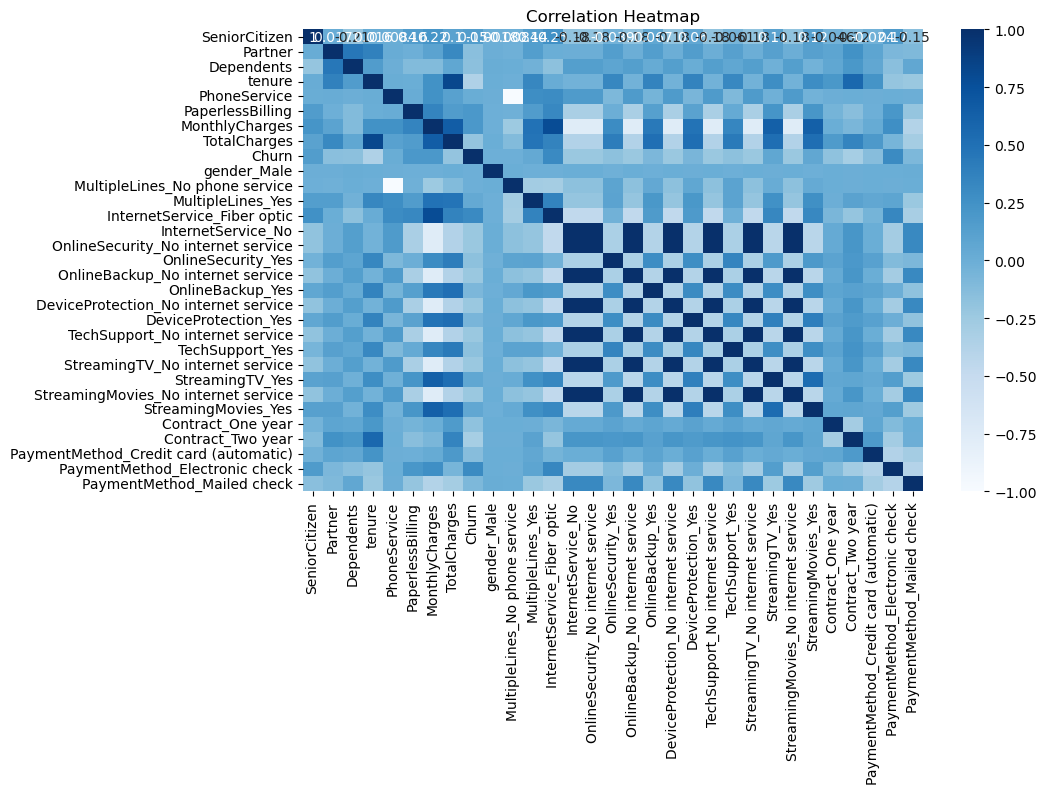

In [35]:
# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(customer.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
# Define features (X) and target variable (y)
X = customer.drop(['Churn'], axis=1)  
y = customer['Churn']

In [37]:
# balancing the data
customer.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [39]:
# Verify the balance of the new dataset
print(y_smote.value_counts())

Churn
0    5163
1    5163
Name: count, dtype: int64


In [40]:
# split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [41]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

## DECISION TREE

Accuracy: 0.7826718296224588

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1037
           1       0.78      0.79      0.78      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



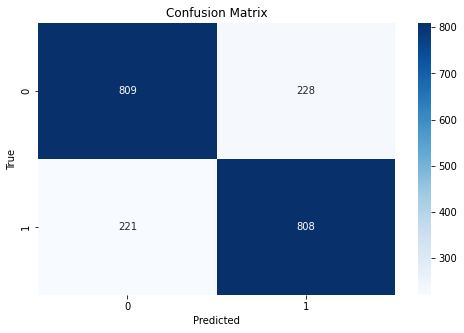

In [25]:
# Build and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## HYPERPARAMETER TUNING DECISION TREE

Best hyperparameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7894482090997096

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1037
           1       0.78      0.80      0.79      1029

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



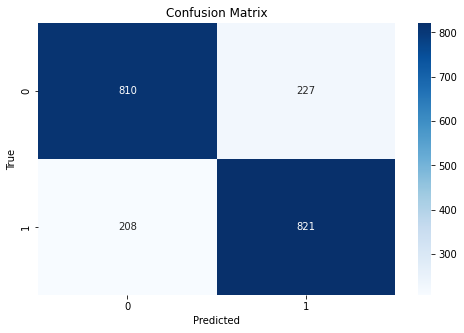

In [26]:
# Define the parameter grid
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Make predictions
y_pred = best_dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## MLP

Accuracy: 0.8272023233301065

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1037
           1       0.81      0.86      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



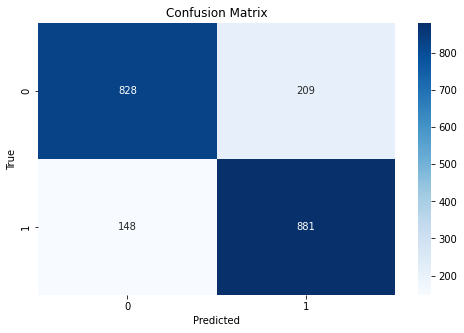

In [27]:
# Build and train the MLP model
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## HYPERPARAMETER TUNING MLP

Best hyperparameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 0.8272023233301065

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1037
           1       0.81      0.86      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



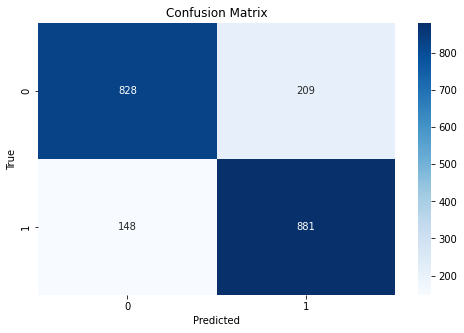

In [28]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': [ 'relu'],
    'solver': [ 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)

# Make predictions
y_pred = best_mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## KNN

Accuracy: 0.7725072604065828

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      1037
           1       0.75      0.82      0.78      1029

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066



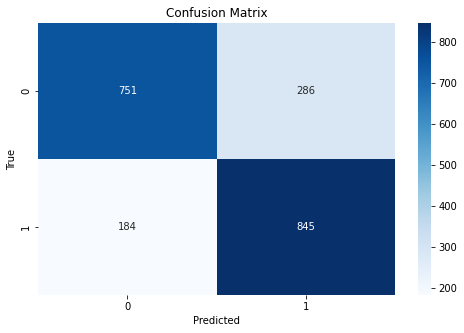

In [29]:
# Build and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## HYPERPARAMETER TUNING KNN

Best hyperparameters found:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.7797676669893514

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      1037
           1       0.75      0.84      0.79      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



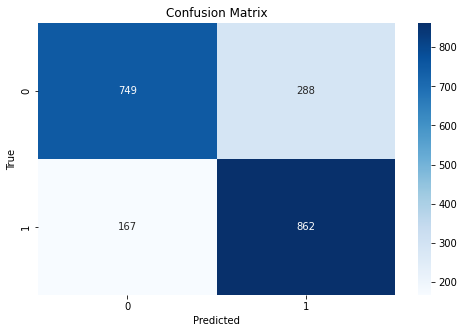

In [30]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3,  9],
    'weights': ['uniform', ],
    'algorithm': ['auto']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## CROSS VALIDATION

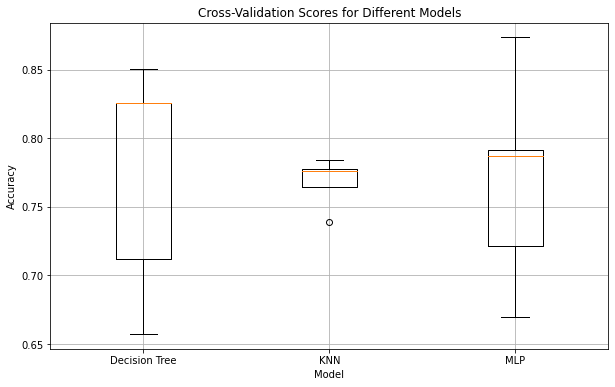

In [31]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

# Perform cross-validation and collect scores
all_scores = {name: cross_val_score(model, X_smote, y_smote, cv=5) for name, model in models.items()}

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(all_scores.values(), labels=all_scores.keys())
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## Receiver Operating Characteristic (ROC)

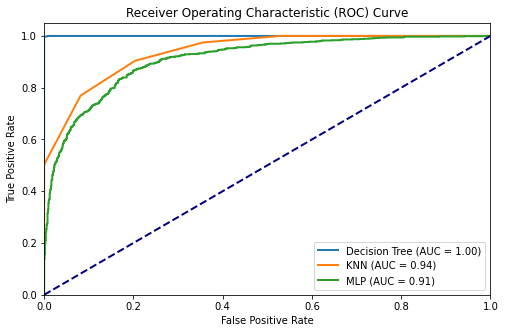

In [32]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}
# Plot ROC curves
plt.figure(figsize=(8, 5))

for name, model in models.items():
    model.fit(X_smote, y_smote)
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, prob_pos)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall curves

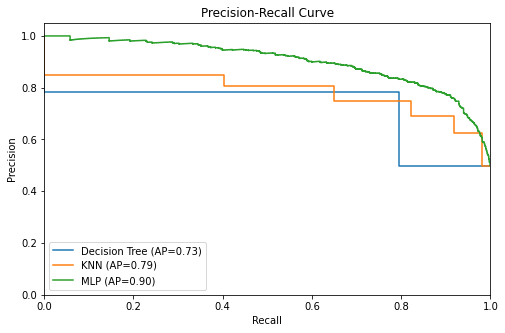

In [33]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

plt.figure(figsize=(8, 5))

# Plot Precision-Recall curves for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, prob_pos)
    average_precision = average_precision_score(y_test, prob_pos)
    plt.step(recall, precision, where='post', label=f'{name} (AP={average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Reinforcement Learning

## Discretizing the State Space

In [42]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize the state space
n_bins = 5
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X_smote)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


## Defining the Synthetic Environment

In [43]:
class SyntheticEnv:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.state = None
        self.steps = 0
        self.max_steps = len(X)
        self.reset()
    
    def reset(self):
        self.steps = 0
        self.state = tuple(map(int, self.X[self.steps]))
        return self.state
    
    def step(self, action):
        reward = 0
        if action == 1 and self.y[self.steps] == 1:
            reward = 1
        self.steps += 1
        done = self.steps >= self.max_steps
        if not done:
            self.state = tuple(map(int, self.X[self.steps]))
        return self.state, reward, done

env = SyntheticEnv(X_discrete, y_smote)

## Initializing Q-Table and Hyperparameters

In [44]:
# Initialize Q-table as a dictionary
q_table = {}

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration-exploitation parameter
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 5000
action_size = 2  # 0: do nothing, 1: offer incentive

## Implementing Q-Learning Algorithm

In [45]:
import random

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(action_size))
        else:
            action = np.argmax(q_table.get(state, [0, 0]))
        
        next_state, reward, done = env.step(action)
        
        if state not in q_table:
            q_table[state] = [0] * action_size
        if next_state not in q_table:
            q_table[next_state] = [0] * action_size
        
        q_value = q_table[state][action]
        best_q_value = max(q_table[next_state])
        q_table[state][action] = q_value + alpha * (reward + gamma * best_q_value - q_value)
        
        state = next_state
        total_reward += reward

    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    if (episode + 1) % 100 == 0:
        print(f'Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}')

Episode: 100, Total Reward: 3505, Epsilon: 0.606
Episode: 200, Total Reward: 4082, Epsilon: 0.367
Episode: 300, Total Reward: 4460, Epsilon: 0.222
Episode: 400, Total Reward: 4608, Epsilon: 0.135
Episode: 500, Total Reward: 4873, Epsilon: 0.082
Episode: 600, Total Reward: 4984, Epsilon: 0.049
Episode: 700, Total Reward: 5027, Epsilon: 0.030
Episode: 800, Total Reward: 5071, Epsilon: 0.018
Episode: 900, Total Reward: 5117, Epsilon: 0.011
Episode: 1000, Total Reward: 5076, Epsilon: 0.010
Episode: 1100, Total Reward: 5120, Epsilon: 0.010
Episode: 1200, Total Reward: 5122, Epsilon: 0.010
Episode: 1300, Total Reward: 5088, Epsilon: 0.010
Episode: 1400, Total Reward: 5080, Epsilon: 0.010
Episode: 1500, Total Reward: 5072, Epsilon: 0.010
Episode: 1600, Total Reward: 5028, Epsilon: 0.010
Episode: 1700, Total Reward: 5125, Epsilon: 0.010
Episode: 1800, Total Reward: 5088, Epsilon: 0.010
Episode: 1900, Total Reward: 5081, Epsilon: 0.010
Episode: 2000, Total Reward: 5108, Epsilon: 0.010
Episode: 

## Evaluating the Agent

Total Rewards: 5112
Churns Prevented: 5112
Accuracy: 0.7177028859190393
Precision: 0.6409227683049148
Recall: 0.990122022080186
F1 Score: 0.7781414110662912


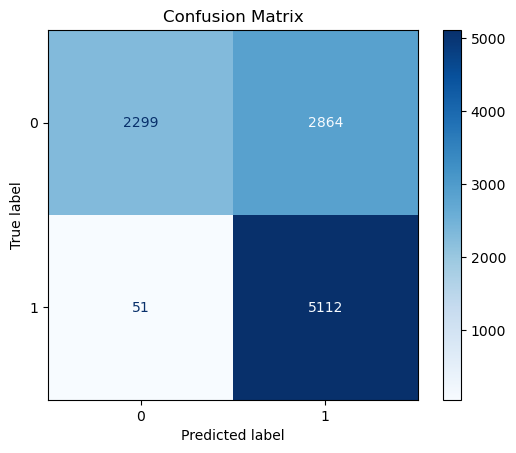

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the agent systematically
total_rewards = 0
churns_prevented = 0
true_labels = []
pred_labels = []

state = env.reset()
done = False

while not done:
    action = np.argmax(q_table.get(state, [0, 0]))
    next_state, reward, done = env.step(action)
    state = next_state
    total_rewards += reward
    if reward == 1:
        churns_prevented += 1
    true_labels.append(env.y[env.steps - 1])  # True label
    pred_labels.append(action)  # Predicted action as label

print(f'Total Rewards: {total_rewards}')
print(f'Churns Prevented: {churns_prevented}')

# Calculate metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
conf_matrix = confusion_matrix(true_labels, pred_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Analyzing Q-Values and State Visits

In [47]:
# Print a subset of the Q-table for analysis
print("Q-values for some states:")
for state in list(q_table)[:5]:
    print(f"State: {state}, Q-values: {q_table[state]}")

Q-values for some states:
State: (0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0), Q-values: [47.11718063169938, 51.92509304616957]
State: (0, 0, 0, 2, 4, 0, 1, 1, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4), Q-values: [47.678961592400995, 52.45088422619766]
State: (0, 0, 0, 0, 4, 4, 1, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4), Q-values: [49.17403597805979, 52.98263587567942]
State: (0, 0, 0, 3, 0, 0, 1, 1, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0), Q-values: [52.5093340549526, 48.1288796886369]
State: (0, 0, 0, 0, 4, 4, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0), Q-values: [48.883146791849356, 53.04821965286455]


## Precision Recall Curve

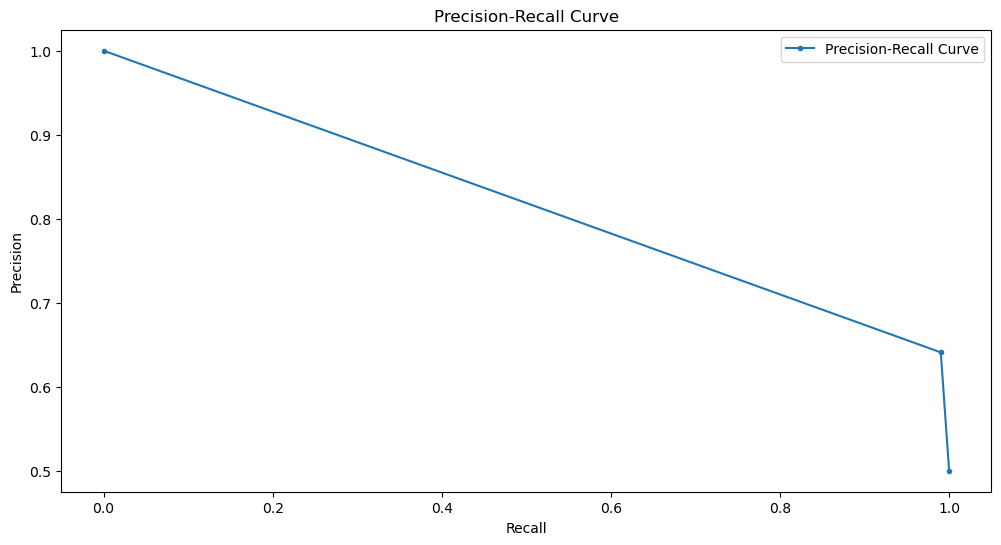

In [48]:
# Generate and plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels, pred_labels)

plt.figure(figsize=(12, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Inductive Logic Programming

## Loading Required Libraries

In [2]:
!pip install swiplserver
!pip3 install pyswip
!pip install PyILP

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement 

## Preprocessing the Dataset for ILP requirements

In [3]:
# Load the dataset
customer_ILP = pd.read_csv('Telco-Customer-Churn.csv')

# Drop unnecessary column
customer_ILP.drop('customerID', axis=1, inplace=True)

# Replace empty strings or spaces with NaN in the TotalCharges column
customer_ILP['TotalCharges'] = customer_ILP['TotalCharges'].replace(' ', pd.NA)

# Drop rows with NaN values in the TotalCharges column
customer_ILP = customer_ILP.dropna(subset=['TotalCharges'])

# Convert TotalCharges to numeric
customer_ILP['TotalCharges'] = pd.to_numeric(customer_ILP['TotalCharges'])

# Map 'Churn' column to 1 and 0
customer_ILP['Churn'] = customer_ILP['Churn'].map({'Yes': 1, 'No': 0})

# Sample the data
sampled_data = customer_ILP.sample(n=1500, random_state=42)

# Display the structure of the sampled data
print(sampled_data.head())

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2481    Male              1     Yes         No      61          Yes   
6784  Female              0      No         No      19          Yes   
6125    Male              0     Yes         No      13          Yes   
3052    Male              0     Yes         No      37          Yes   
4099  Female              0      No         No       6           No   

         MultipleLines InternetService       OnlineSecurity  \
2481               Yes              No  No internet service   
6784               Yes              No  No internet service   
6125               Yes     Fiber optic                   No   
3052               Yes             DSL                  Yes   
4099  No phone service             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
2481  No internet service  No internet service  No internet service   
6784  No internet service  No internet service  No i

## Selecting Feature And Target Columns

In [4]:
# Selecting Feature Columns for PyGol
feature_col = sampled_data.columns[:-1]

# Selecting Target Column for PyGol
target = sampled_data.columns[-1]

## Importing PyGol Library

In [6]:
import sys
sys.path.insert(0, '../../')
from PyGol import *


## Generating First-Order Logic Rules for Predictive Modeling using PyGol

In [7]:
from PyGol import prepare_logic_rules, prepare_examples, read_constants_meta_info, bottom_clause_generation

# Generate first-order logic rules as background knowledge for PyGol
background = prepare_logic_rules(sampled_data, feature_col, meta_information="meta_data.info", default_div=4, conditions={})

# Generate Examples files
examples = prepare_examples(sampled_data, target)

# Generate Constant list
const = read_constants_meta_info()

# Generate Bottom Clause
P, N = bottom_clause_generation(file="BK.pl", constant_set=const, container="dict",
                                positive_example="pos_example.f", negative_example="neg_example.n")

100%|█████████████████████████████████████████| 400/400 [00:05<00:00, 75.80it/s]


## Learning First-Order Logic Model using Aleph

In [ ]:
from PyILP.PyILP import aleph_learn

# Run Aleph to learn the model
model_1=aleph_learn(file="bk_jupyter.pl", positive_example="pos_example.f", negative_example="neg_example.n", test_size=0)
# Print the learned model
print(model)

## ILP Result

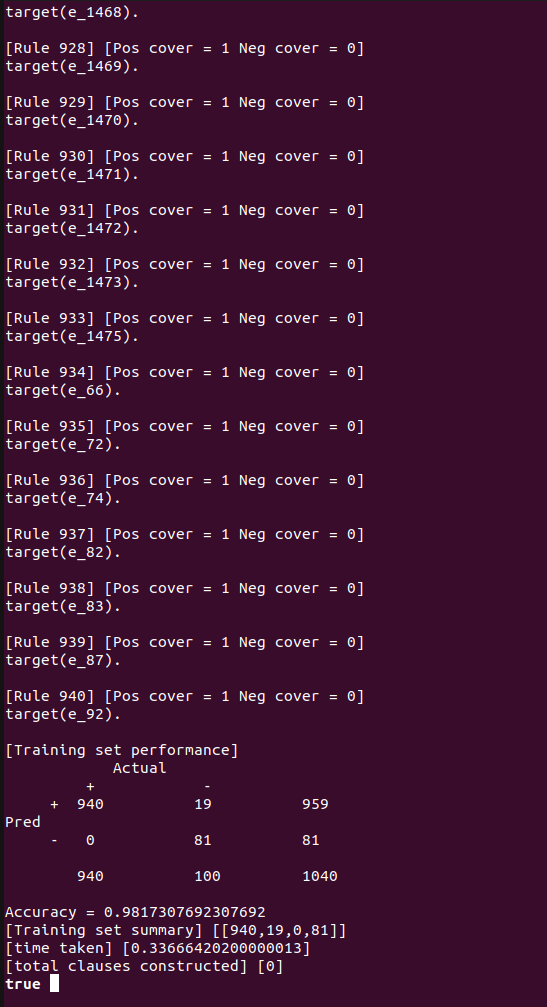

In [1]:
from IPython.display import Image

# Display an image file
image_path = "/user/HS402/ss05145/Pictures/Screenshots/Screenshot from 2024-05-28 23-55-50.png"
Image(filename=image_path)